# Average classifier

The purpose of that assignment is to design an average classifier for each class, and classify the images using the distance to each class representation.

# Setup

In [125]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
plt.ion()

root_ds = '.'

## Mounting Google Drive (Google Colab only)
First, we'll mount the distant Google Drive locally. We assume here you have created a shortcut `2020-MSAIMove_computervision_shared` pointing to the class shared folder.

Rather than downloading, distant mounting ensure fast access without need of download.

In [126]:
if 'google.colab' in str(get_ipython()):
  import os
  from google.colab import drive
  drive.mount('/content/drive')
  
  root_ds = '/content/drive/MyDrive/2020-MSAIMove_computervision_shared/datasets/'
  assert(os.path.exists(root_ds))

  ! cp /content/drive/MyDrive/2020-MSAIMove_computervision_shared/common/image_tools.py .
  ! cp /content/drive/MyDrive/2020-MSAIMove_computervision_shared/common/input_tools.py .


import image_tools, input_tools

if 'google.colab' in str(get_ipython()):
  input_tools.root_path = os.path.join(root_ds)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Classification

First, let's define the function distance, dataset to use and load the later using the python script provided.

In [138]:
db_name = 'db1'  # db1, db2, cifar-100
distance = "L2"  # L1 | L2

# Load DB
# Return classes as N (class_name), train_data as Nx2 (class_idx, image), test_data as Nx2 (class_idx, image)
classes, train_data, test_data = input_tools.load_db(db_name)


In [139]:
# Classifier function
def classifier_train(data):

    # TODO: Write the classifier
    classifier = np.mean(data,axis=0)
    return classifier

def classify(classifiers, q):
    # Compute Mx2 array of distances for each sample: (class, distance)
    if distance == "L1":
        # TODO: Code the L1 distance between classifiers and q
         distances = [np.sum(np.abs(classifiers[i]-q)) for i in range(len(classes))]
         pass
    elif distance == "L2":
        # TODO: Code the L2 distance between classifiers and q
        distances = [np.sqrt(np.sum((classifiers[i]-q)**2)) for i in range(len(classes))]         
        pass
    else:
        raise NotImplementedError()
    index = np.argmin(distances)
    # Return the closest class according to the distances array
    return index # Change this line (of course)

burger
face
Test 0 / 10
Classification score is :  100.0


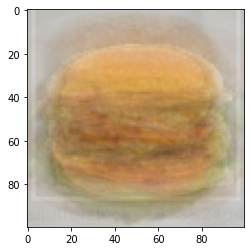

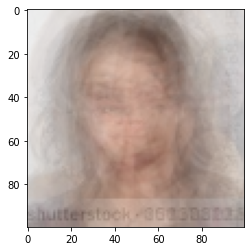

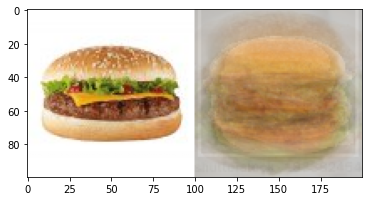

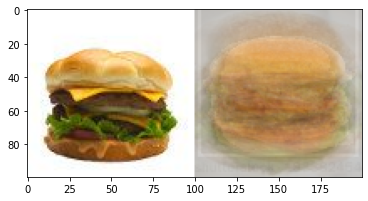

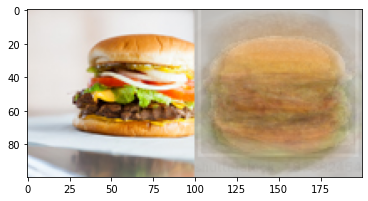

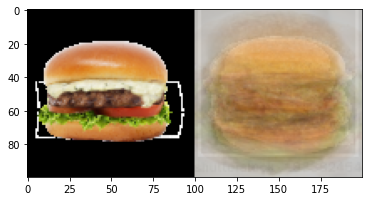

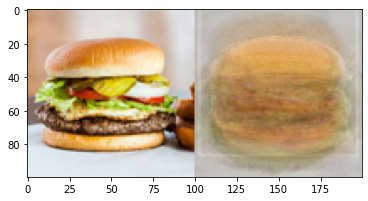

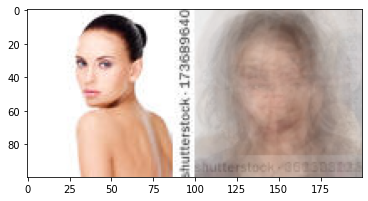

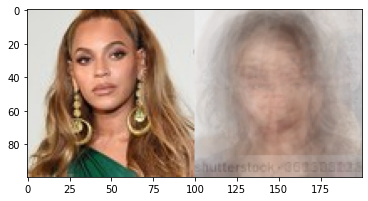

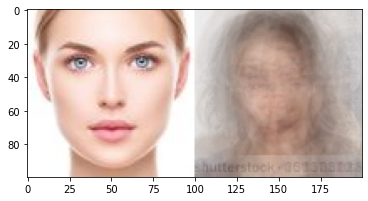

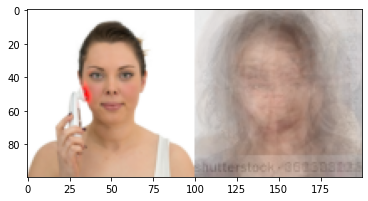

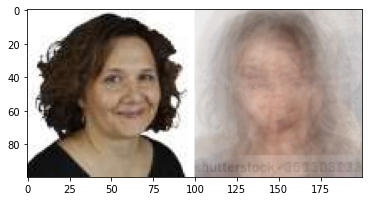

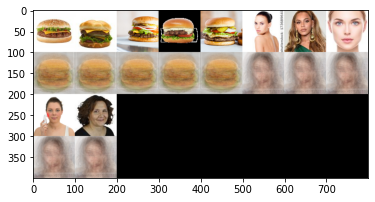

In [140]:
# Train classifiers
classifiers = np.zeros_like(classes, dtype=np.object)
classif_score = 0.
for i, c in enumerate(classes):
    print("%s" % c)

    # TODO: Select the train data for classes index i (i.e. the image where class_idx==i)
    class_data  = train_data[train_data[:,0] ==i][:,1]

    classifiers[i] = classifier_train(class_data)

    # TODO: Show the classifier (uncomment once the classifier is written)
    plt.figure(c)
    plt.imshow(classifiers[i][..., ::-1])
    plt.draw()


# Test classifiers
test_data = test_data[:100]  # Select the 100 first
predictions = np.zeros(test_data.shape[0], dtype=np.int)
for i in range(len(test_data)):
    if i % 10 == 0:
        print('Test %d / %d' % (i, len(test_data)))

    label, q = test_data[i]

    predictions[i] = classify(classifiers, q)
    if label == predictions[i]:
      classif_score += 1
    plt.figure("Test %d" % i)
    plt.imshow(np.hstack([q, classifiers[predictions[i]]])[..., ::-1])
    plt.draw() 

# TODO: Compute precision score and display it
print("Classification score is : " ,(classif_score/len(test_data))*100)
# TODO: Uncomment the following lines when your code is ready ONLY
# ----
output = [np.vstack([test_data[i, 1], classifiers[label_p]]) for i, label_p in enumerate(predictions)]
output_gallery = image_tools.gallery_db(output, 8)
#
plt.figure("Output")
plt.imshow(output_gallery[..., ::-1])
plt.draw()
# ----

In [113]:
class_data_one  = train_data[train_data[:,0] ==0][:,1]

class_data_two  = train_data[train_data[:,0] ==1][:,1]

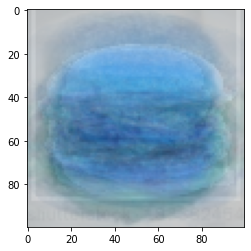

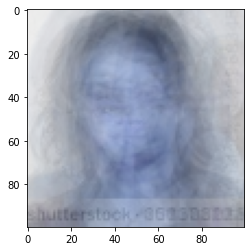

In [117]:
plt.imshow(np.mean(class_data_two))

In [119]:
y1 = np.array([[1,2,3,4],[5,6,7,8]])
print(y1.argmin())

0


In [121]:

test_data = test_data[:100]  # Select the 100 first
predictions = np.zeros(test_data.shape[0], dtype=np.int)

In [122]:
predictions.shape

(10,)

In [ ]:
classifiy()